<a href="https://colab.research.google.com/github/luisfranc123/Tutorials_Statistics_Numerical_Analysis/blob/main/Applied_Statistics/Linear_Regression_Molecular_Biology_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Estimating Linear Models**

There are several kinds of linear regression models in statsmodels, from the more basic (e.g., ordinary least squares) to more complex (e.g., iteratively reweighted least squares).

Linear models in statsmodels have two different main interfaces: array based and formula based. These are accessed through these API module imports:

<img src = "https://www.embl.org/news/wp-content/uploads/2023/05/webimage-D897E6EC-84F1-403D-A9E3998764050F1F.jpg" width = '500' height = '300'>

**Image taken from**: [EMBL](https://www.embl.org/news/wp-content/uploads/2023/05/webimage-D897E6EC-84F1-403D-A9E3998764050F1F.jpg)

###**Libraries**:

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

##**Molecular Biology Context**:
---
In a molecular biology study, researchers are analyzing gene expression levels to understand how different molecular features (e.g., expression of three genes) influence a biological response (e.g., protein production rate).

The following data simulates:

- Independent variables (X): Expression levels of three genes, each generated from a normal distribution with distinct variances to mimic variability in gene expression.

- Dependent variable (y): Biological response (e.g., protein production), influenced by gene expression (X) through a linear model with some added noise (ε) to simulate measurement error or biological variability.

The coefficients beta (β) represent the relative influence of each gene on the response.

We then generate the data based on the previous description:

###**Explanation of Components**:

**Gene Expression Levels (X)**:
Simulated using `dnorm`, with varying variances (0.4, 0.6, 0.2) to reflect different variability in gene expression levels.

**Noise (ε)**:
Added using a normal distribution with a small variance (0.1) to model random errors in the biological response.

**Response (y)**:
Linearly modeled as a weighted sum of gene expression levels (β⋅X) plus noise. Coefficients (β=[0.1,0.3,0.5]) reflect the relative contribution of each gene.

In [ ]:
import numpy as np

# To make the example reproducible
rng = np.random.default_rng(seed=123)

def dnorm(mean, variance, size=1):
    if isinstance(size, int):
        size = size,
    return mean + np.sqrt(variance) * rng.standard_normal(*size)

# Simulation parameters
N = 2000  # Number of samples
# Simulating gene expression levels for 3 genes
X = np.c_[dnorm(0, 0.4, size=N),
          dnorm(0, 0.6, size=N),
          dnorm(0, 0.2, size=N)]
# Simulating noise (biological variability)
eps = dnorm(0, 0.1, size=N)
# Coefficients representing the influence of each gene
beta = [0.1, 0.3, 0.5]

# Simulating protein production rate
y = np.dot(X, beta) + eps


In [ ]:
# Print a summary of the data
print("Simulated Gene Expression Levels (X):")
print(X[:5])  # Show first 5 samples
print("\nSimulated Protein Production (y):")
print(y[:5])  # Show first 5 response values

Simulated Gene Expression Levels (X):
[[-0.62557527 -0.29765301  0.0630157 ]
 [-0.2326087   1.16606363  0.64230723]
 [ 0.81455546 -0.45437279  0.90161046]
 [ 0.12268019 -0.53567971 -0.58784247]
 [ 0.58200512 -0.46964248 -0.07138524]]

Simulated Protein Production (y):
[-0.56727333  0.62498344  0.41446064 -0.60042395  0.16004888]


A linear model is generally fitted with an intercept term. The `sm.add_constant` function can add an intercept column to an existing matrix:

**Note:** If we don't do `sm. dd_constant` or when `LinearRegression fit_intercept=False)`, then both statsmodels and sklearn algorithms assume that b=0 in y = mx + b, and it'll fit the model using b=0 instead of calculating what b is supposed to be based on your data. **It'is therefore a must add the constant within the X set of values**.

In [ ]:
X_model = sm.add_constant(X)
X_model[:5]

array([[ 1.        , -0.62557527, -0.29765301,  0.0630157 ],
       [ 1.        , -0.2326087 ,  1.16606363,  0.64230723],
       [ 1.        ,  0.81455546, -0.45437279,  0.90161046],
       [ 1.        ,  0.12268019, -0.53567971, -0.58784247],
       [ 1.        ,  0.58200512, -0.46964248, -0.07138524]])

The `sm.OLS` class can fit an ordinary least squares linear regression:

In [ ]:
model = sm.OLS(y, X)

The model's `fit` method returns a regression results object containing estimated model parameters and other diagnostics:

In [ ]:
results = model.fit()
params = results.params
params

array([0.08806872, 0.30690538, 0.48974207])

The `summary` method on `results` can print a model detailing diagnostic output of the model:

In [ ]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.509
Model:                            OLS   Adj. R-squared (uncentered):              0.508
Method:                 Least Squares   F-statistic:                              689.0
Date:                Tue, 03 Dec 2024   Prob (F-statistic):                   1.94e-307
Time:                        21:28:06   Log-Likelihood:                         -540.32
No. Observations:                2000   AIC:                                      1087.
Df Residuals:                    1997   BIC:                                      1103.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Method 2**: Using the `statsmodels` formula API and forua strings:


As you could observe, the parameter names here have been given generic names x1, x2, and so on. Now, lets create a Data Frame object containing the parameters employing in the molecular biology context:

In [ ]:
data = pd.DataFrame(X, columns = ['gene_1', 'gene_2', 'gene_3'])
data['Protein_Production_rate'] = y
data.sample(5)

,gene_1,gene_2,gene_3,Protein_Production_rate
712,-0.948621,-0.111113,-0.356040,-0.480017
615,-0.177588,-1.215440,-0.173186,-0.188654
1746,0.455160,-1.072728,0.318961,-0.024660
1191,0.102009,0.507663,-0.403684,0.087143
1277,-0.670886,0.223239,-0.088926,-0.575591


In [ ]:
results_ols = smf.ols('Protein_Production_rate ~ gene_1 + gene_2 + gene_3',
                  data = data).fit()
results_ols.params

,0
Intercept,-0.001811
gene_1,0.088093
gene_2,0.306907
gene_3,0.489825


In [ ]:
print(results_ols.summary())

                               OLS Regression Results                              
Dep. Variable:     Protein_Production_rate   R-squared:                       0.509
Model:                                 OLS   Adj. R-squared:                  0.508
Method:                      Least Squares   F-statistic:                     688.7
Date:                     Tue, 03 Dec 2024   Prob (F-statistic):          2.81e-307
Time:                             21:28:07   Log-Likelihood:                -540.29
No. Observations:                     2000   AIC:                             1089.
Df Residuals:                         1996   BIC:                             1111.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
In

##**Make Predictions**:

By employing the model, we can make predictions of possible *Protein Production Rate* given the recorded activity (transcription rate) of a set of genes.

In [ ]:

df_predict = pd.DataFrame({"predicted_values": results_ols.predict(data),
                           "observed_values": data['Protein_Production_rate']})
df_predict["residuals_2"] = (df_predict["predicted_values"] - df_predict["observed_values"])**2
df_predict["residuals_2"].sum()

201.00184334800616

In [ ]:
print("Predicted values employing the developed OLS model")
print(results_ols.predict(data[:5]))
print("---------------------")
print("Observations taken from raw data")
print(data['Protein_Production_rate'].head())

###**Scatter Plot (Observed vs Predicted)**:

Shows the relationship between observed and predicted protein production rates. The black dashed line represents a **perfect fit**.


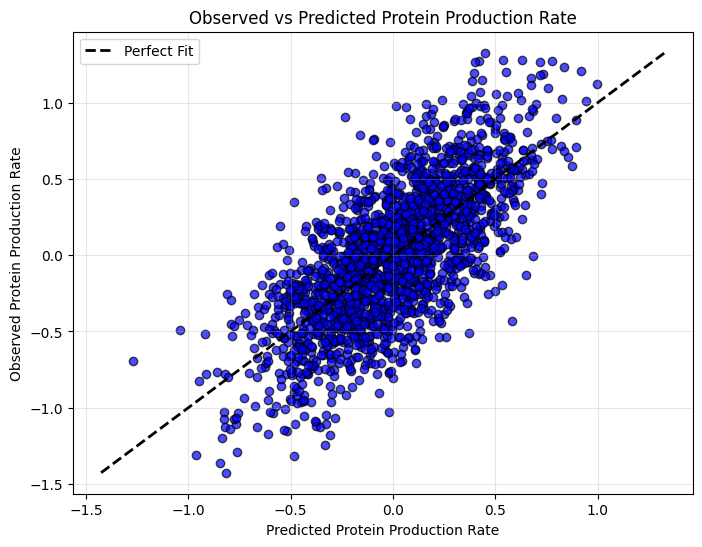

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Predicted values and residuals
predicted = results_ols.fittedvalues
observed = data['Protein_Production_rate']

# Scatter plot of observed vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(predicted, observed, alpha=0.7, color='blue', edgecolor='k')
plt.plot([observed.min(), observed.max()], [observed.min(), observed.max()],
         color='black', linestyle='--', linewidth=2, label='Perfect Fit')
plt.title('Observed vs Predicted Protein Production Rate')
plt.xlabel('Predicted Protein Production Rate')
plt.ylabel('Observed Protein Production Rate')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


###**Residual Plot**:

Residuals *(Observed-Predicted)* vs predicted values. **A random scatter around the horizontal line at 0 indicates a good fit without systematic bias.**

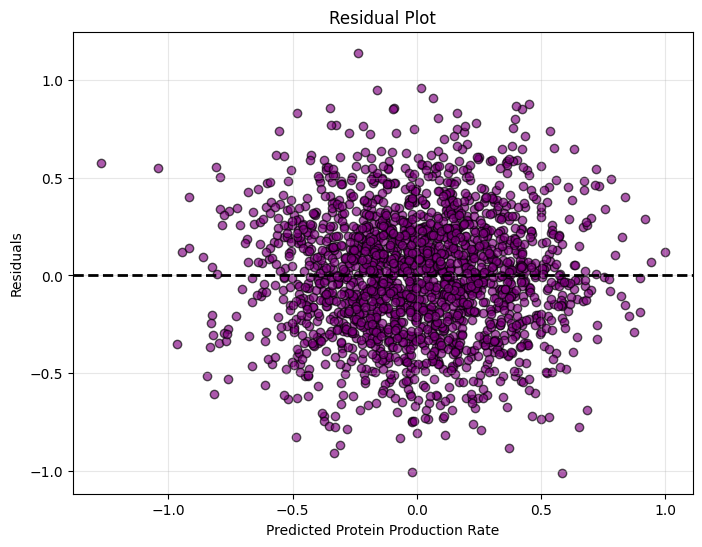

In [ ]:
# Residual plot
residuals = results_ols.resid
plt.figure(figsize=(8, 6))
plt.scatter(predicted, residuals, alpha=0.65, color='purple', edgecolor='k')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Protein Production Rate')
plt.ylabel('Residuals')
plt.grid(alpha=0.3)
plt.show()

###**Scatter Plots**:
---
- Each subplot shows the scatter plot of one gene (gene1,gene2,gene3) against the dependent variable (i.e., Protein Production Rate).
- A fitted line is overlaid on each plot, derived from a univariate OLS (Ordinary Leat Squares) regression.
- Subplots: All three gene-response relationships are displayed side by side for easy comparison.

*This visualization helps to observe how individual predictors relate to the response variable and the fit quality of simple linear models.*

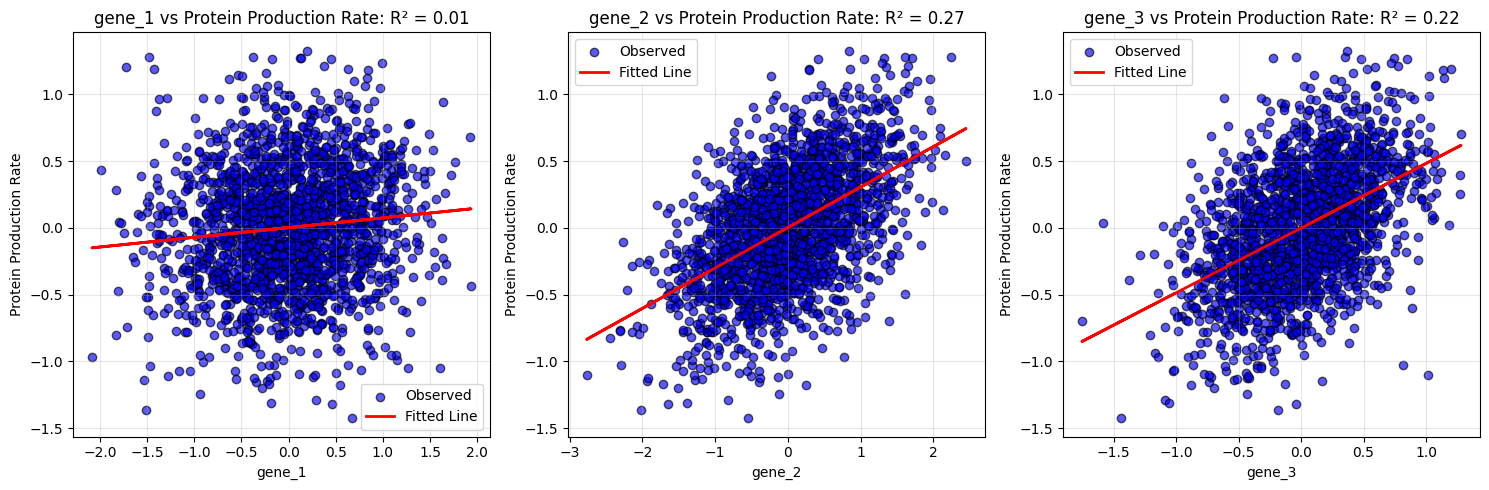

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Variables for plotting
genes = ['gene_1', 'gene_2', 'gene_3']
y = data['Protein_Production_rate']

# Create scatter plots with fitted lines
plt.figure(figsize=(15, 5))
for i, gene in enumerate(genes):
    plt.subplot(1, 3, i + 1)
    X = data[gene]
    X_with_const = sm.add_constant(X)  # Add constant for OLS
    ols_model = sm.OLS(y, X_with_const).fit()  # Fit OLS model
    fitted_line = ols_model.predict(X_with_const)  # Fitted values
    r2 = ols_model.rsquared
    # Scatter plot
    plt.scatter(X, y, alpha=0.65, color='blue', edgecolor='k', label='Observed')
    plt.plot(X, fitted_line, color='red', linewidth=2, label='Fitted Line')
    plt.title(f'{gene} vs Protein Production Rate: R\u00b2 = {r2:.2f}')
    plt.xlabel(gene)
    plt.ylabel('Protein Production Rate')
    plt.legend()
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


**Model Interpretation**:

In a multiple regression model predicting protein production based on the expression levels of three genes (gene1​, gene2​, and gene3), interpret the coefficients of each gene. What does each coefficient indicate about the relationship between gene expression and protein production?

**Variable Significance**:

After running the regression, one gene has a p-value above 0.05. Discuss whether this gene should be excluded from the model. What are the potential implications of excluding or retaining this variable?

**Interaction Effects**:

Suppose gene1​ and gene2 are hypothesized to interact in influencing protein production. How would you test for interaction effects using multiple regression, and how might such effects be interpreted biologically?

**Multicollinearity**:

During the analysis, it is discovered that gene2​ and gene3​ are highly correlated. How would multicollinearity affect the regression model, and what steps could you take to address this issue?

**Model Evaluation**:

The model's R2 value is 0.75. What does this indicate about the model's fit? Discuss additional metrics (e.g., adjusted R2, residual analysis) that could be used to evaluate the model's performance in predicting protein production.